In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

In [2]:
V = 'V0*(tanh(phi/sqrt(6)))**2*(1 + A*(sech((phi - phi0)/sigma))**2)'
parameters = {'V0' : 1.448e-10, 'A' : 2.044880e-3, 'phi0' : 4.850001, 'sigma': 2.524999e-2}
potential = PotentialFunction.from_string(V, param_values=parameters) 

#Creando instancia de la clase Background. 
background = Background(potential, phi0 = 6.3) 
background.solver()

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)
Nend = background.data()['N'][-1]

In [4]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 60)
sol = pert.Power_spectra_pivot()


Curvature power spectrum at pivot scale is 2.0924194018893565e-09
Tensor to scalar ratio at pivot scale is 0.0045114310036488674


In [5]:
PS = pert.Power_spectrum(save = True)


Computing P(k): 1000it [01:57,  8.48it/s]


k_peak = 4.80\times 10^{+12} Mpc^-1
N_peak = 46.054125497612254
P_s(k_peak) = 0.03087035644923752


<Figure size 800x500 with 0 Axes>

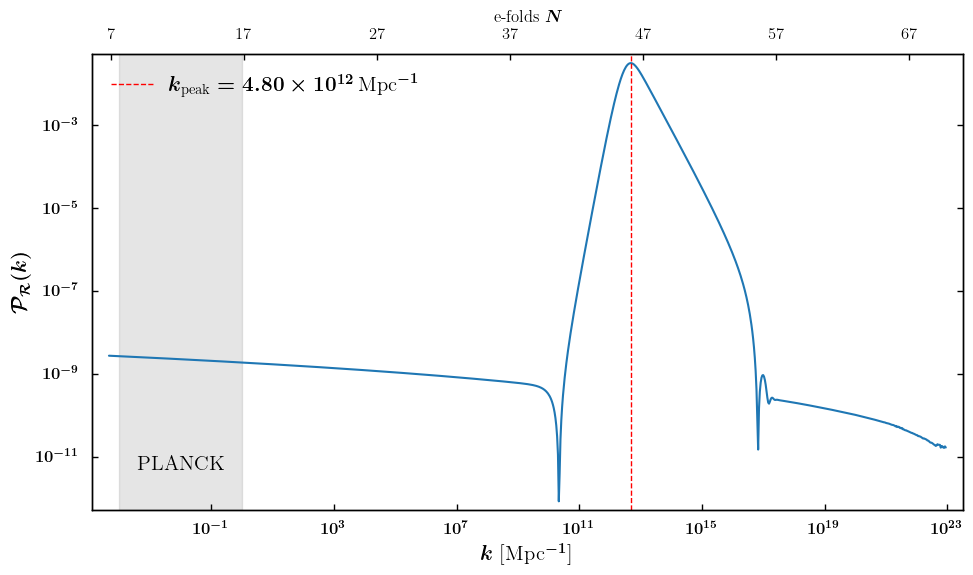

In [7]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar')

In [8]:
print(pert.Spectral_tilts)

{'n_s': 0.9607538251972026, 'n_t': -0.0007058314021094877}


## PBH Abundance after re-entry horizon in RD era

In [9]:
pbh = PBHAbundance(pert, delta_c=0.4, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save=True)

fPBH_peak = 0.9661364130354699
MPBH_peak = 1.5881318171524883e-13 M⊙


(1e-20, 10000.0)

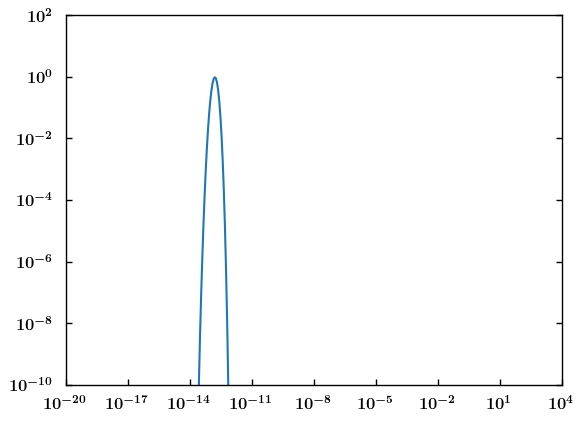

In [10]:
plt.loglog(mPBH, fPBH)
plt.ylim(1e-10, 1e2)
plt.xlim(1e-20, 1e4)
